# Import Data & Visualization

## Import Package

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare Data

In [29]:
test_set = pd.read_csv("Data/TestSet.csv")
train_set = pd.read_csv("Data/TrainingSet.csv")
test_subset = pd.read_csv("Data/TestSubset.csv")
train_subset = pd.read_csv("Data/TrainingSubset.csv")

In [30]:
train_set.info() # Output train_set data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258588 entries, 0 to 258587
Data columns (total 28 columns):
EbayID                     258588 non-null int64
QuantitySold               258588 non-null int64
Price                      258588 non-null float64
PricePercent               258588 non-null float64
StartingBidPercent         258588 non-null float64
SellerName                 258588 non-null object
SellerClosePercent         258588 non-null float64
Category                   258588 non-null int64
PersonID                   258588 non-null int64
StartingBid                258588 non-null float64
AvgPrice                   258588 non-null float64
EndDay                     258588 non-null object
HitCount                   258588 non-null int64
AuctionAvgHitCount         258588 non-null int64
ItemAuctionSellPercent     258588 non-null int64
SellerSaleAvgPriceRatio    258588 non-null float64
SellerAvg                  258588 non-null float64
SellerItemAvg              258588 non-

In [31]:
train_set.head()

,EbayID,QuantitySold,Price,PricePercent,StartingBidPercent,SellerName,SellerClosePercent,Category,PersonID,StartingBid,...,AuctionHitCountAvgRatio,BestOffer,ReturnsAccepted,IsHOF,ItemListedCount,AuctionCount,AuctionSaleCount,SellerAuctionCount,SellerAuctionSaleCount,AuctionMedianPrice
0,160983189073,1,27.25,1.4787,0.0537,petesandi,0.925926,73396,9174,0.99,...,29,1.540541,0,1,1,583,291,54,50,12.26
1,390549601720,1,43.00,1.4422,0.3350,graphn4fun,0.990566,27278,11046,9.99,...,55,0.404762,0,0,0,120,43,106,105,24.45
2,200901284676,1,11.00,0.5969,0.5426,hondo19461946,0.422131,73396,9174,10.00,...,21,0.324324,0,1,1,583,291,244,103,12.26
3,271162670857,0,10.00,0.5426,0.5426,winemeyer45,0.245098,73396,9174,10.00,...,26,0.270270,0,0,1,583,291,102,25,12.26
4,310611578768,0,9.99,1.9159,1.9159,chucksmemorabilia,0.295359,73396,17956,9.99,...,53,0.200000,0,1,0,137,44,237,70,3.02


In [32]:
train_data = train_set.drop(['EbayID','QuantitySold','SellerName'],axis = 1)
train_target = train_set['QuantitySold']
# Gets the total number of features
n_trainSamples, n_features = train_data.shape

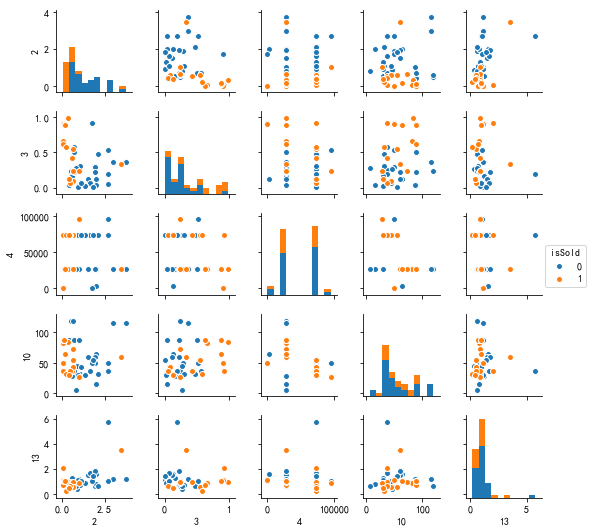

In [33]:
# isSold: Auction success is 1, auction failure is 0
df = pd.DataFrame(np.column_stack((train_data, train_target)), columns = list(range(n_features)) + ['isSold'])
sns.pairplot(df[:50], vars = [2,3,4,10,13], hue = 'isSold', size = 1.5)

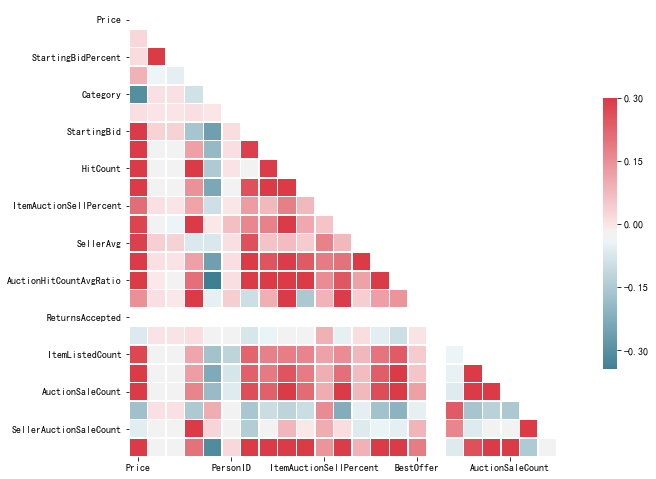

In [40]:
train = train_set.drop(['EbayID','QuantitySold','SellerName','EndDay'],axis = 1)
plt.figure(figsize = (10,10))

# The correlation matrix of the data is calculated
corr = train.corr()

# produce keep out the heat map triangle part of the mask, because the heat the graph is symmetric matrix
# so you just output the lower triangular part
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Produces the corresponding color change in the heat map
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Call the heat in seanborn to create a heat map
sns.heatmap(corr, cmap = cmap, mask = mask, vmax = .3,
            square = True, xticklabels = 5, yticklabels = 2,
            linewidths = .5, cbar_kws = {'shrink':.5})

# Rotate yticks into the horizontal direction for easy viewing
plt.yticks(rotation = 0)

plt.show()

/home/demeen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


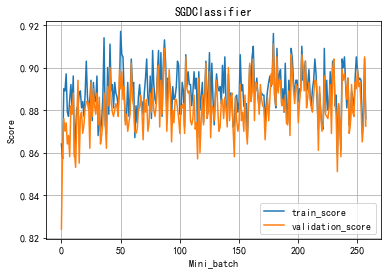

In [35]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

# The results of mini_batch learning for SGDClassifier in the training process were drawn
def plot_learning(clf,title):
    plt.figure()
    
    # Record the prediction of the last training result in this training
    validationScore = []
    # Record the forecast situation after adding this training result
    trainScore = []
    # Minimum training frequency
    mini_batch = 1000
    for i in range(int(np.ceil(n_trainSamples / mini_batch))):
        x_batch = train_data[i * mini_batch : min((i + 1) * mini_batch, n_trainSamples)]
        y_batch = train_target[i * mini_batch: min((i + 1) * mini_batch, n_trainSamples)]
        
        if i > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch, classes = range(5))
        if i > 0:
            trainScore.append(clf.score(x_batch, y_batch))
    plt.plot(trainScore, label = "train_score")
    plt.plot(validationScore, label = "validation_score")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc = 'best')
    plt.grid()
    plt.title(title)
    plt.savefig('test.jpg')

# Normalized data
scaler = StandardScaler()
train_data = scaler.fit_transform(train_data.drop(['EndDay'], axis = 1))

# Create SGDClassifier
clf = SGDClassifier(penalty = 'l2', alpha = 0.001)
plot_learning(clf, 'SGDClassifier')

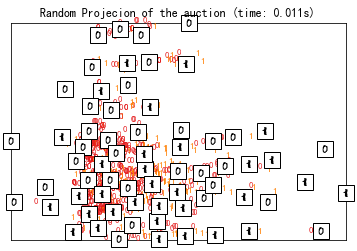

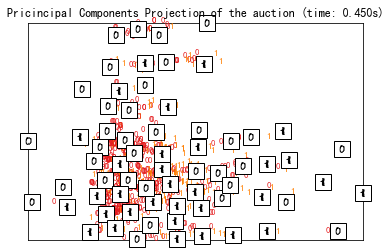

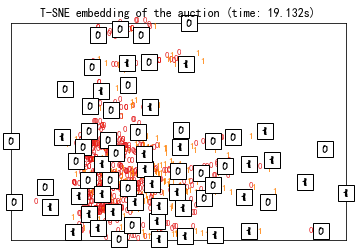

In [36]:
from sklearn import manifold, decomposition, random_projection
from matplotlib import offsetbox
from time import time

images = []
images.append([
    [0., 0., 5., 13., 9., 1., 0., 0.],
    [0., 0., 13., 15., 10., 15., 5., 0.],
    [0., 3., 15., 2., 0., 11., 8., 0.],
    [0., 4., 12., 0., 0., 8., 8., 0.],
    [0., 5., 8., 0., 0., 9., 8., 0.],
    [0., 4., 11., 0., 1., 12., 7., 0.],
    [0., 2., 14., 5., 10., 12., 0., 0.],
    [0., 0., 6., 13., 10., 0., 0., 0.]
])
images.append([
    [0., 0., 0., 12., 13., 5., 0., 0.],
    [0., 0., 0., 11., 16., 9., 0., 0.],
    [0., 0., 3., 15., 16., 6., 0., 0.],
    [0., 7., 15., 16., 16., 2., 0., 0.],
    [0., 0., 1., 16., 16., 3., 0., 0.],
    [0., 0., 1., 16., 16., 6., 0., 0.],
    [0., 0., 1., 16., 16., 6., 0., 0.],
    [0., 0., 0., 11., 16., 10., 0., 0.]
])
# 1000 pieces of data were selected for visual display
show_instances = 1000

# define the drawing function
def plot_embedding(X, p, title = None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    
    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i,0], X[i,1], str(train_target[i]),
                 color = plt.cm.Set1(train_target[i] / 2.),
                 fontdict = {'weight':'bold','size':9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([
            [1., 1.]
        ])
    for i in range(show_instances):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 4e-3:
            # don't show points that are too close
            continue
        shown_images = np.r_[shown_images, [X[i]]]
        auctionbox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(images[train_target[i]], cmap = plt.cm.gray_r), X[i]
        )
        ax.add_artist(auctionbox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.savefig("test%s.jpg" % p)
        
# Random Projuection
start_time = time()
rp = random_projection.SparseRandomProjection(n_components = 2,random_state = 50)
rp.fit(train_data[:show_instances])
train_projected = rp.transform(train_data[:show_instances])
plot_embedding(train_projected, '1', "Random Projecion of the auction (time: %.3fs)" % (time() - start_time))

# PCA
start_time = time()
train_pca = decomposition.TruncatedSVD(n_components = 2).fit_transform(train_data[:show_instances])
plot_embedding(train_projected, '2', "Pricincipal Components Projection of the auction (time: %.3fs)" % (time() - start_time))

# t-sns
start_time = time()
tsne= manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
train_tsne = tsne.fit_transform(train_data[:show_instances])
plot_embedding(train_projected, '3', "T-SNE embedding of the auction (time: %.3fs)" % (time() - start_time))

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

train_data = scaler.fit_transform(train_data)

train_pred = clf.predict(train_data)

print("SGDClassifier training performance on testing dataset:")
print("\tPrecision：%1.3f" % precision_score(train_target, train_pred))
print("\tRecall：%1.3f" % recall_score(train_target, train_pred))
print("\tF1：%1.3f \n" % f1_score(train_target, train_pred))

SGDClassifier training performance on testing dataset:
	Precision：0.874
	Recall：0.728
	F1：0.794 



array([[-3.84090811e-02,  1.76294153e-04, -1.07866273e-01, ...,
        -5.80929965e-01, -3.76076023e-01, -2.25655919e-01],
       [ 3.15070007e-01, -2.86109518e-03, -8.44680406e-02, ...,
        -5.52624950e-01, -2.74461715e-01,  1.43219659e-01],
       [-4.03109728e-01, -7.32037036e-02, -6.72000950e-02, ...,
        -4.77507795e-01, -2.78156781e-01, -2.25655919e-01],
       ...,
       [-5.60435976e-01,  9.41356448e-02,  1.04581028e-01, ...,
        -5.68410439e-01, -4.22264345e-01, -5.66691830e-01],
       [ 2.30850587e-02, -1.02312711e-01, -9.17794684e-02, ...,
        -3.41425992e-01, -3.59448228e-01,  8.70984846e-01],
       [-3.69445053e-01, -9.20438390e-02, -1.04963329e-01, ...,
        -5.16155027e-01, -1.69152342e-01,  9.31691628e-03]])

In [52]:
test.shape

(9392, 29)

/home/demeen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGD regressor prediction result on testing data: 0.936


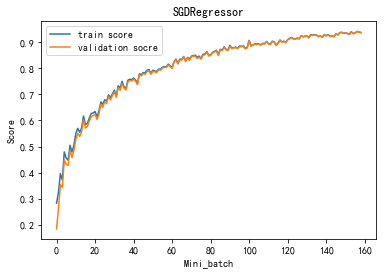

In [63]:
from sklearn.linear_model import SGDRegressor
import random
from sklearn.preprocessing import MinMaxScaler

# prepare data
test_subset = pd.read_csv('Data/TestSubset.csv')
train_subset = pd.read_csv('Data/TrainingSubset.csv')

# Training Data
train = train_subset.drop(['EbayID','Price','SellerName','EndDay'],axis=1)
train_target = train_subset['Price']

scaler = MinMaxScaler()
train = scaler.fit_transform(train)
n_trainSamples, n_features = train.shape

# ploting example from scikit-learn
def plot_learning(clf,title):

    plt.figure()
    validationScore = []
    trainScore = []
    mini_batch = 500
    # define the shuffle index
    idx = list(range(n_trainSamples))
    random.shuffle(idx)

    for i in range(int(np.ceil(n_trainSamples / mini_batch))):
        x_batch = train[idx[i * mini_batch: min((i + 1) * mini_batch, n_trainSamples)]]
        y_batch = train_target[idx[i * mini_batch: min((i + 1) * mini_batch, n_trainSamples)]]

        if i > 0:
            validationScore.append(clf.score(x_batch, y_batch))
        clf.partial_fit(x_batch, y_batch)
        if i > 0:
            trainScore.append(clf.score(x_batch, y_batch))

    plt.plot(trainScore, label="train score")
    plt.plot(validationScore, label="validation socre")
    plt.xlabel("Mini_batch")
    plt.ylabel("Score")
    plt.legend(loc='best')
    plt.title(title)

sgd_regresor = SGDRegressor(penalty='l2',alpha=0.001)
plot_learning(sgd_regresor,"SGDRegressor")

# 准备测试集查看测试情况
test = test_subset.drop(['EbayID','Price','SellerName','EndDay'],axis=1)
test = scaler.fit_transform(test)
test_target = test_subset['Price']

print("SGD regressor prediction result on testing data: %.3f" % sgd_regresor.score(test,test_target))

plt.show()